In [1]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt

In [2]:
image = np.array([[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]], dtype = np.float32)

In [3]:
image.shape

(1, 3, 3, 1)

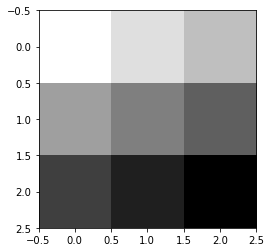

In [4]:
plt.imshow(image.reshape(3, 3), cmap = 'gray_r')

In [5]:
weight = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])

In [6]:
weight.shape

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

### Valid 패딩

In [7]:
sess = tf.InteractiveSession()
conv2d = tf.nn.conv2d(image, weight, [1, 1, 1, 1], 'VALID')
conv2d_img = conv2d.eval()
sess.close()

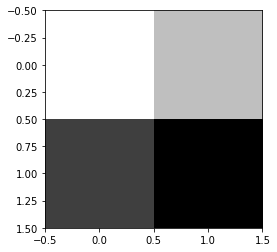

In [8]:
plt.imshow(conv2d_img.reshape(2, 2), cmap = 'gray_r')

[[12. 16.]
 [24. 28.]]


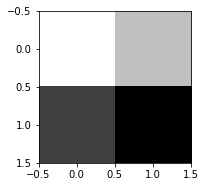

In [9]:
for i, img in enumerate(conv2d_img):
    print(img.reshape(2, 2))
    plt.subplot(1, 2, i + 1)
    plt.imshow(img.reshape(2, 2), cmap = 'gray_r')

### Same 패딩

In [10]:
sess = tf.InteractiveSession()
conv2d = tf.nn.conv2d(image, weight, [1, 1, 1, 1], 'SAME')
conv2d_img = conv2d.eval()
sess.close()

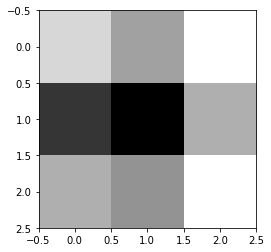

In [11]:
plt.imshow(conv2d_img.reshape(3, 3), cmap = 'gray_r')

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


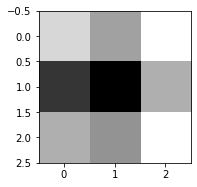

In [12]:
for i, img in enumerate(conv2d_img):
    print(img.reshape(3, 3))
    plt.subplot(1, 2, i + 1)
    plt.imshow(img.reshape(3, 3), cmap = 'gray_r')

---

In [13]:
import random
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### 하이퍼파라미터 설정

In [15]:
lr = 0.001
epochs = 3
batch_size = 256


In [16]:
tf.reset_default_graph()

#### Input Layer

In [17]:
X = tf.placeholder(tf.float32, [None, 28 * 28])
X_img = tf.reshape(X, [-1, 28, 28, 1])

y = tf.placeholder(tf.float32, [None, 10])

In [18]:
keep_prob = tf.placeholder(tf.float32)

#### Convolution Layer 1

In [19]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))
layer1 = tf.nn.relu(tf.nn.conv2d(X_img, W1, [1, 1, 1, 1], 'SAME'))
layer1 = tf.nn.dropout(tf.nn.max_pool(layer1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME'), keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Convolution Layer 2

In [20]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))

In [21]:
layer2 = tf.nn.relu(tf.nn.conv2d(layer1, W2, [1, 1, 1, 1], 'SAME'))

In [22]:
layer2 = tf.nn.dropout(tf.nn.max_pool(layer2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME'), keep_prob)

In [23]:
layer2_flat = tf.reshape(layer2, [-1, 7 * 7 * 64])

#### Fully Connected Neural Network

In [24]:
W3 = tf.get_variable('W3', [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [25]:
hf = tf.matmul(layer2_flat, W3) + b3

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = hf))

In [27]:
opt = tf.train.AdamOptimizer(lr).minimize(cost)

In [28]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1)), dtype = tf.float32))

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([opt, cost], {X : X_batch, y : y_batch, keep_prob : 0.7})
            avg_cost += cost_val / total_batch
        print('epoch : {:04d}, cost : {:.5f}'.format(epoch + 1, avg_cost))
    print('accuracy : {}'.format(sess.run(accuracy, {X : mnist.test.images, y : mnist.test.labels, keep_prob : 1.0})))

epoch : 0001, cost : 0.64882
epoch : 0002, cost : 0.17753
epoch : 0003, cost : 0.13323
accuracy : 0.9742000102996826
